In [1]:
#only run it when you are on colab
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/nlp_project

Mounted at /content/drive
/content/drive/MyDrive/nlp_project


In [ ]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
def get_data_from_SimpleWiki(line) :
  line = line.split()
  while RepresentsInt(line[0]) is False :
    line = line[1:]
  line = line[1:]
  return " ".join(line)

In [ ]:
simple = open("corpus/simple.txt",'r')
simple_last_col = open("corpus/simple_last_col.txt",'w')

In [ ]:
for _ in range(505974) :
  line = simple.readline()
  if len(line) == 0 :
    continue
  if len(get_data_from_SimpleWiki(line)) == 0 :
    continue  
  print(get_data_from_SimpleWiki(line),file= simple_last_col)

In [ ]:
import os
import csv
import nltk
import string
import argparse
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def lemmatize(text,x):
	lemmas = [lemmatizer.lemmatize(word) for word in x] 
	return " ".join(lemmas)

# remove stopwords
def remove_stopwords(text,x):
  y = set(stopwords.words('english'))
  words = [w for w in x if (w not in y)]
  return " ".join(words)


In [ ]:

def preprocess_line(line) :
  line = line.lower()
  translator = str.maketrans('', '', string.punctuation)
  line  = line.translate(translator)
  # try :
  #   nltk.data.find('corpora/stopwords')
  # except LookupError:
  #   nltk.download('stopwords')
  x = word_tokenize(line)
  line = remove_stopwords(line,x)
  x = word_tokenize(line)
  line = lemmatize(line,x)
  return line

In [ ]:
preprocess_line("a picture with a smile -|and perhaps , a tear .")

'picture smile perhaps tear'

In [ ]:
! wc corpus/simple_last_col.txt

  505272  9205781 48443058 corpus/simple_last_col.txt


In [ ]:
simple_last_col = open("corpus/simple_last_col.txt",'r')
simple_last_col_preprocessed = open("corpus/simple_last_col_preprocessed.txt",'w')
uptil = ""
for _ in range(505272):
  uptil += " "
  uptil += simple_last_col.readline()
print("phase 1 done")
print(preprocess_line(uptil),file = simple_last_col_preprocessed)

phase 1 done


In [ ]:
! wc corpus/simple_last_col.txt

  505272  9205781 48443058 corpus/simple_last_col.txt


In [ ]:
! wc corpus/simple_last_col_preprocessed.txt

       0  4738347 32369302 corpus/simple_last_col_preprocessed.txt


In [ ]:
! wc corpus/simple_last_col_preprocessed.txt

       1  4738347 32369303 corpus/simple_last_col_preprocessed.txt


In [ ]:
! wc corpus/subtitles.txt

 3062510 17267212 74901150 corpus/subtitles.txt


In [ ]:
!head corpus/subtitles.txt

the kid -charles chaplin
a picture with a smile -|and perhaps , a tear .
`` charity hospital ''
the woman -|whose sin was motherhood .
alone .
the man .
his morning promenade .
`` awkward ass . ''
`` pardon me , you dropped something . ''
`` is that yours ? ''


In [ ]:
subtitles = open("corpus/subtitles.txt",'r')
subtitles_preprocessed = open("corpus/subtitles_preprocessed.txt",'w')
uptil = ""
for _ in range(3062510  ):
  uptil += " "
  uptil += subtitles.readline()
print("phase 1 done")

print(preprocess_line(uptil),file = subtitles_preprocessed )

phase 1 done


In [ ]:
! wc corpus/subtitles_preprocessed.txt

       0  6769796 40751767 corpus/subtitles_preprocessed.txt


Make frequency wise sorted file

In [ ]:
subtitles_preprocessed = open("corpus/subtitles_preprocessed.txt",'r')
subtitles_preprocessed = subtitles_preprocessed.readline().split()
freq={}
for i in subtitles_preprocessed :
  if i in freq :
    freq[i]+=1
  else :
    freq[i]= 1
freq = sorted([[-freq[i],i] for i in freq])

subtitles_sorted = open("corpus/subtitles_sorted.txt",'w')

for i in freq :
  print(-i[0],i[1], file = subtitles_sorted)

In [ ]:
simple_last_col_preprocessed = open("corpus/simple_last_col_preprocessed.txt",'r')
simple_last_col_preprocessed = simple_last_col_preprocessed.readline().split()
freq={}
for i in simple_last_col_preprocessed :
  if i in freq :
    freq[i]+=1
  else :
    freq[i]= 1
freq = sorted([[-freq[i],i] for i in freq])

simple_last_col_sorted = open("corpus/simple_last_col_sorted.txt",'w')

for i in freq :
  print(-i[0],i[1], file = simple_last_col_sorted)

In [ ]:
freq[:10]

[[-76880, 'lrb'],
 [-76807, 'rrb'],
 [-27051, 'also'],
 [-24363, 'people'],
 [-22781, 'one'],
 [-18326, 'first'],
 [-17997, 'many'],
 [-17251, 'state'],
 [-17122, 'called'],
 [-16349, 'used']]

In [ ]:
!ls

corpus	data  predictions


In [ ]:
!ls corpus

familarity.txt			  simple.txt
simple_last_col_preprocessed.txt  subtitles_preprocessed.txt
simple_last_col_sorted.txt	  subtitles_sorted.txt
simple_last_col.txt		  subtitles.txt


In [ ]:
! wc corpus/simple_last_col_sorted.txt

 174266  174267 1549196 corpus/simple_last_col_sorted.txt


In [ ]:
! wc corpus/subtitles_sorted.txt

 128347  128341 1147548 corpus/subtitles_sorted.txt


In [ ]:
! head corpus/subtitles_sorted.txt

nt
get
know
oh
go
right
like
come
got
one


In [ ]:
! wc corpus/English.txt

  31102  789635 4169614 corpus/English.txt


In [ ]:
English = open("corpus/English.txt",'r')
English_preprocessed = open("corpus/English_preprocessed.txt",'w')
uptil = ""
for _ in range(31102):
  uptil += " "
  uptil += English.readline()
print("phase 1 done")

print(preprocess_line(uptil),file = English_preprocessed )

phase 1 done


In [ ]:
!ls corpus

English_preprocessed.txt	  simple_last_col.txt
English.txt			  simple.txt
familarity.txt			  subtitles_preprocessed.txt
nlpdata_craft			  subtitles_sorted.txt
simple_last_col_preprocessed.txt  subtitles.txt
simple_last_col_sorted.txt


In [ ]:
!wc corpus/English_preprocessed.txt

      0  374504 2336983 corpus/English_preprocessed.txt


In [ ]:
English_preprocessed = open("corpus/English_preprocessed.txt",'r')
English_preprocessed = English_preprocessed.readline().split()
freq={}
for i in English_preprocessed :
  if i in freq :
    freq[i]+=1
  else :
    freq[i]= 1
freq = sorted([[-freq[i],i] for i in freq])

English_sorted = open("corpus/English_sorted.txt",'w')

for i in freq :
  print(-i[0],i[1], file = English_sorted)

In [ ]:
!wc corpus/English_sorted.txt

  6808  13616 129516 corpus/English_sorted.txt


In [ ]:
!wc corpus/English_sorted.txt

 5533 11068 57370 corpus/English_sorted.txt


In [ ]:
!tail corpus/English_sorted.txt

3 doctor
3 doorkeeper
3 dothan
3 dreg
3 drieth
3 dropping
3 dulcimer
3 dull
3 dweller
3 dwellingplace

In [ ]:
frea[:10]

NameError: ignored

In [ ]:
!ls corpus

English_preprocessed.txt	  simple_last_col_sorted.txt
English_sorted.txt		  simple_last_col.txt
English.txt			  simple.txt
familarity.txt			  subtitles_preprocessed.txt
nlpdata_craft			  subtitles_sorted.txt
simple_last_col_preprocessed.txt  subtitles.txt


In [ ]:
import os 
path = "corpus/nlpdata_craft"
dir_list = os.listdir(path)
assert(len(dir_list)==67)

# uptil = ""
out = open("corpus/biomedical.txt",'w')
for x in dir_list :
	f = open(os.path.join(path,x),"r",encoding="utf8")
	for y in f :
		print(y,file =out)

In [ ]:
! wc corpus/biomedical.txt

  27251  434678 2889361 corpus/biomedical.txt


In [ ]:
biomedical = open("corpus/biomedical.txt",'r')
biomedical_preprocessed = open("corpus/biomedical_preprocessed.txt",'w')
uptil = ""
for _ in range(27251):
  uptil += " "
  uptil += biomedical.readline()
print("phase 1 done")

print(preprocess_line(uptil),file = biomedical_preprocessed )

phase 1 done


In [ ]:
! wc corpus/biomedical_preprocessed.txt

      0  283403 2162055 corpus/biomedical_preprocessed.txt


In [ ]:
biomedical_preprocessed = open("corpus/biomedical_preprocessed.txt",'r')
biomedical_preprocessed = biomedical_preprocessed.readline().split()
freq={}
for i in biomedical_preprocessed :
  if i in freq :
    freq[i]+=1
  else :
    freq[i]= 1
freq = sorted([[-freq[i],i] for i in freq])

biomedical_sorted = open("corpus/biomedical_sorted.txt",'w')

for i in freq :
  print(-i[0],i[1], file = biomedical_sorted)

In [ ]:
! wc corpus/biomedical_sorted.txt

 20074  40150 229470 corpus/biomedical_sorted.txt


In [ ]:
import pandas as pd
def plot_dis(file):
  import matplotlib.pyplot as plt
  import numpy as np
  from matplotlib import colors
  from matplotlib.ticker import PercentFormatter
  # plt.hist?
  f = open("corpus/" +file,'r')
  data = []
  for x in f :
    y = int(x.split()[0])
    data.append(y)
  # ser = pd.Series(data)
  freq = {}
  for i in data :
    if i in freq :
      freq[i]+=1
    else :
      freq[i]=1
  # freq = sorted(freq)
  # print(freq)
  x=[]
  y=[]
  for i in sorted(freq.keys(),reverse=True) :
    x.append(i)
    y.append(freq[i])
  # print(x)
  plt.scatter(x, y,s=5,color='r')
  # plt.plot(x, y)
  name = file.split('.')[0]
  plt.savefig('plots/'+name+"_scatter.png",dpi=1000)
  plt.clf()

  plt.hist(data,bins = 100,color='r')
  plt.savefig('plots/'+name+"_histogram.png",dpi=1000)
  plt.clf()
  for i in range(1,len(y)) :
    y[i]+=y[i-1]
  plt.scatter(x, y,s=5,color='b')
  # plt.plot(x, y)
  plt.savefig('plots/'+name+"_scatter_cumulative.png",dpi=1000)
  plt.clf()
  plt.hist(data,bins = 100,cumulative=-1)
  plt.savefig('plots/'+name+"_histogram_cumulative.png",dpi=1000) 
  plt.clf()
  ## the difference is still not clearly visivle in cumulative we will take reverse cumulative
  plt.hist(data,bins = 100,cumulative=1)
  plt.savefig('plots/'+name+"_histogram_cumulative_JustToKnowTheDifference.png",dpi=1000) 

  


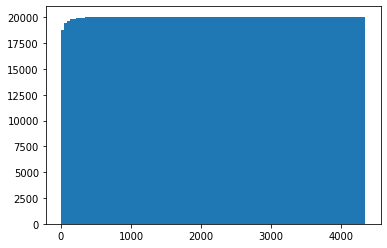

In [ ]:
plot_dis("biomedical_sorted.txt")

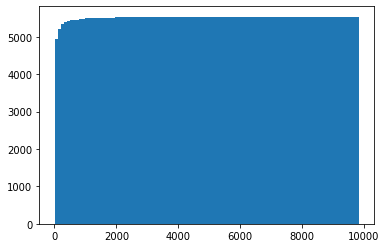

In [ ]:
plot_dis("English_sorted.txt")

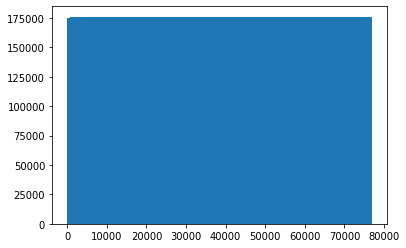

In [ ]:
plot_dis("simple_last_col_sorted.txt")

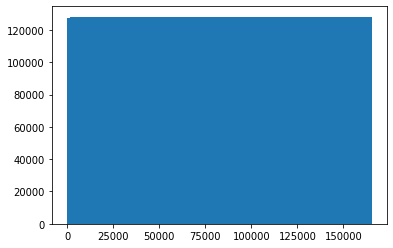

In [ ]:
plot_dis("subtitles_sorted.txt")

In [11]:
!ls corpus

biomedical_preprocessed.txt  simple_last_col_preprocessed.txt
biomedical_sorted.txt	     simple_last_col_sorted.txt
biomedical.txt		     simple_last_col.txt
English_preprocessed.txt     simple.txt
English_sorted.txt	     subtitles_preprocessed.txt
English.txt		     subtitles_sorted.txt
familarity.txt		     subtitles.txt
nlpdata_craft


In [12]:
! ls corpus | grep sorted

biomedical_sorted.txt
English_sorted.txt
simple_last_col_sorted.txt
subtitles_sorted.txt


In [18]:
% cd corpus

/content/drive/My Drive/nlp_project/corpus


In [19]:
! cp biomedical_sorted.txt English_sorted.txt simple_last_col_sorted.txt subtitles_sorted.txt ../data/sorted

In [20]:
% cd ..

/content/drive/My Drive/nlp_project


In [21]:
! ls data/sorted/

biomedical_sorted.txt  simple_last_col_sorted.txt
English_sorted.txt     subtitles_sorted.txt


In [23]:
% cd ..

/content/drive/My Drive/nlp_project


In [26]:
! ls data/sorted

bible_sorted.txt  biomedical_sorted.txt  subtitles_sorted.txt  wiki_sorted.txt


In [36]:

import os 
import pandas as pd

def add_single_feature(file,top_bible,top_subtitles,top_biomedical,top_wiki) :
  df = pd.read_csv("data/preprocessed/" +file )

  ###############biomedical###########################

  top_word = []
  f = open("data/sorted/biomedical_sorted.txt",'r')
  for i in range(top_biomedical) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word  = df.at[i,"token"]
    if type(word) is not str :
      ans.append(0)
    else :
      if word in top_word :
        ans.append(1)
      else :
        ans.append(0)
  df['biomedical'] = ans

  ###############biomedical###########################

  ###############bible###########################

  top_word = []
  f = open("data/sorted/bible_sorted.txt",'r')
  for i in range(top_bible) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word  = df.at[i,"token"]
    if type(word) is not str :
      ans.append(0)
    else :
      if word in top_word :
        ans.append(1)
      else :
        ans.append(0)
  df['bible'] = ans

  ###############bible###########################

  ###############subtitles###########################

  top_word = []
  f = open("data/sorted/subtitles_sorted.txt",'r')
  for i in range(top_subtitles) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word  = df.at[i,"token"]
    if type(word) is not str :
      ans.append(0)
    else :
      if word in top_word :
        ans.append(1)
      else :
        ans.append(0)
  df['subtitles'] = ans

  ###############subtitles###########################


  ###############wiki###########################

  top_word = []
  f = open("data/sorted/wiki_sorted.txt",'r')
  for i in range(top_wiki) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word  = df.at[i,"token"]
    if type(word) is not str :
      ans.append(0)
    else :
      if word in top_word :
        ans.append(1)
      else :
        ans.append(0)
  df['wiki'] = ans

  ###############wiki###########################


  df.to_csv("data/added_corpus_presence/"+file,index = False)

In [37]:
add_single_feature("lcp_single_test_preprocessed.csv",500,500,500,500)

In [38]:
add_single_feature("lcp_single_train_preprocessed.csv",500,500,500,500)

In [41]:

import os 
import pandas as pd

def add_multi_feature(file,top_bible,top_subtitles,top_biomedical,top_wiki) :
  df = pd.read_csv("data/preprocessed/" +file )

  ###############biomedical###########################

  top_word = []
  f = open("data/sorted/biomedical_sorted.txt",'r')
  for i in range(top_biomedical) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word1,word2  = df.at[i,"token"].split()

    if word1 in top_word and word2 in top_word :
      ans.append(1)
    else :
      ans.append(0)
  df['biomedical'] = ans

  ###############biomedical###########################

  ###############bible###########################

  top_word = []
  f = open("data/sorted/bible_sorted.txt",'r')
  for i in range(top_bible) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word1,word2  = df.at[i,"token"].split()

    if word1 in top_word and word2 in top_word :
      ans.append(1)
    else :
      ans.append(0)
  df['bible'] = ans

  ###############bible###########################

  ###############subtitles###########################

  top_word = []
  f = open("data/sorted/subtitles_sorted.txt",'r')
  for i in range(top_subtitles) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word1,word2  = df.at[i,"token"].split()

    if word1 in top_word and word2 in top_word :
      ans.append(1)
    else :
      ans.append(0)
  df['subtitles'] = ans

  ###############subtitles###########################


  ###############wiki###########################

  top_word = []
  f = open("data/sorted/wiki_sorted.txt",'r')
  for i in range(top_wiki) :
    line = f.readline()
    word = line.split()[1]
    top_word.append(word)
  top_word = set(top_word)
  ans = []
  for i in range(len(df)) :
    word1,word2  = df.at[i,"token"].split()

    if word1 in top_word and word2 in top_word :
      ans.append(1)
    else :
      ans.append(0)
  df['wiki'] = ans

  ###############wiki###########################


  df.to_csv("data/added_corpus_presence/"+file,index = False)

In [40]:
!ls data/preprocessed

lcp_multi_test_preprocessed.csv   lcp_single_test_preprocessed.csv
lcp_multi_train_preprocessed.csv  lcp_single_train_preprocessed.csv


In [42]:
add_multi_feature("lcp_multi_test_preprocessed.csv",500,500,500,500)

In [43]:
add_multi_feature("lcp_multi_train_preprocessed.csv",500,500,500,500)